# Notebook Setup

Markdown comments = thoughts on high-level, project-management-esque decisions

`# Inline or cell-blocked code comments = thoughts on low-level, coding/optimization decisions `

In [13]:
# Imports
import sys
sys.path.append("../modules/")
import imports
import helper
import eda

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
# To see a full list of my imports, functions, and global variables, see ../modules/

In [15]:
# Loading data
filename = "cuisines"
filepath = f"{imports.DEV_PATH_TO_RAW_DATA}/{filename}.csv"
cuis_df = imports.pd.read_csv(filepath)

filename = "food_violations_seattle"
filepath = f"{imports.DEV_PATH_TO_RAW_DATA}/{filename}.csv"
vio_df = imports.pd.read_csv(filepath)

# EDA

## Data Cleaning P1

In [16]:
# Looking at data of first df
print(cuis_df.columns)
cuis_df.head(3)

Index(['x', 'asian', 'ethnic'], dtype='object')


,x,asian,ethnic
0,Japanese,1,1
1,Restaurants,0,0
2,Sandwiches,0,0


In [17]:
# Looking at data of second df
print(vio_df.columns)
vio_df.head(3)

Index(['Unnamed: 0', 'inspection_id', 'restaurant_id',
       'inspection_period_start_date', 'inspection_period_end_date',
       'inspection_penalty_score', 'inspection_average_prev_penalty_scores',
       'inspection_prev_penalty_score', 'cuisines', 'zip_code', 'review_count',
       'non_positive_review_count', 'average_review_rating',
       'review_contents'],
      dtype='object')


,Unnamed: 0,inspection_id,restaurant_id,inspection_period_start_date,inspection_period_end_date,inspection_penalty_score,inspection_average_prev_penalty_scores,inspection_prev_penalty_score,cuisines,zip_code,review_count,non_positive_review_count,average_review_rating,review_contents
0,0,DA2383404,ZriNDCVxkCdVEO-X2sjHFw,2012-02-06 00:00:00,2012-10-02 00:00:00,46,54.0,50,"['Japanese', 'Restaurants']",98116,1,0,5.000000,We went here this past weekend with zero expec...
1,1,DA2304227,ZriNDCVxkCdVEO-X2sjHFw,2011-11-03 00:00:00,2012-02-06 00:00:00,82,86.0,76,"['Japanese', 'Restaurants']",98116,3,0,4.000000,Lots of young families . Kind of sparse &#160;...
2,2,DA2278690,ZriNDCVxkCdVEO-X2sjHFw,2011-01-06 00:00:00,2011-11-03 00:00:00,24,67.0,41,"['Japanese', 'Restaurants']",98116,7,0,4.428571,This place is a gem! My husband and I didn't h...


In [18]:
# Dropping unnecessary columns
vio_df.drop("Unnamed: 0", axis=1, inplace=True)
vio_df.head(1)

,inspection_id,restaurant_id,inspection_period_start_date,inspection_period_end_date,inspection_penalty_score,inspection_average_prev_penalty_scores,inspection_prev_penalty_score,cuisines,zip_code,review_count,non_positive_review_count,average_review_rating,review_contents
0,DA2383404,ZriNDCVxkCdVEO-X2sjHFw,2012-02-06 00:00:00,2012-10-02 00:00:00,46,54.0,50,"['Japanese', 'Restaurants']",98116,1,0,5.0,We went here this past weekend with zero expec...


In [19]:
# Checking for wrong data formats
print(cuis_df.dtypes)
vio_df.dtypes

x         object
asian      int64
ethnic     int64
dtype: object


inspection_id                              object
restaurant_id                              object
inspection_period_start_date               object
inspection_period_end_date                 object
inspection_penalty_score                    int64
inspection_average_prev_penalty_scores    float64
inspection_prev_penalty_score               int64
cuisines                                   object
zip_code                                    int64
review_count                                int64
non_positive_review_count                   int64
average_review_rating                     float64
review_contents                            object
dtype: object

In [20]:
# cuisine should be a list of strings, but is currently a string
# inspection_period_start/end_date should be datetime or int, but is currently a string

In [21]:
# Briefly checking for false inputs and distributions of first df
eda.check_values_perc(cuis_df)

x
Japanese          0.010101
Brazilian         0.010101
Fondue            0.010101
Mongolian         0.010101
Scandinavian      0.010101
                    ...   
Vegan             0.010101
Vegetarian        0.010101
Middle Eastern    0.010101
Mediterranean     0.010101
Senegalese        0.010101
Name: proportion, Length: 99, dtype: float64

['Japanese', 'Restaurants', 'Sandwiches', 'Vietnamese', 'Delis', 'Dim Sum', 'Seafood', 'Cantonese', 'Chinese', 'Burgers']
---------
asian
0    0.767677
1    0.232323
Name: proportion, dtype: float64

[1, 0]
---------
ethnic
0    0.535354
1    0.464646
Name: proportion, dtype: float64

[1, 0]
---------


In [22]:
# Briefly checking for false inputs and distributions of second df
eda.check_values_perc(vio_df)

inspection_id
DA2383404    0.000075
DA2142224    0.000075
DA2336311    0.000075
DA2265570    0.000075
DA2211438    0.000075
               ...   
DA2322958    0.000075
DA2300986    0.000075
DA2277471    0.000075
DA2196829    0.000075
DA1838071    0.000075
Name: proportion, Length: 13299, dtype: float64

['DA2383404', 'DA2304227', 'DA2278690', 'DA2183562', 'DA2142912', 'DA2081169', 'DA2070387', 'DA1961408', 'DA1892158', 'DAWE0JV4G']
---------
restaurant_id
qMRuz7gLKCW7fu-t6Zbi1Q    0.003835
rbjjAfKbeR9xniV-4lZMNw    0.003309
Y5r2AvXmSc-YA6MGXjK6Ow    0.002557
Y5qNBkfK_KUthraU57TSnw    0.002181
eMPGiuqJQGw36l1hB6-dGA    0.002030
                            ...   
HK0frT9_gAxpmjoxRpWCnQ    0.000075
DnbzrDtrqEoAIyYZETo4gw    0.000075
p5iITJYfyExwqr-2AT6Eig    0.000075
_OYfJb1Tn2gg_R3KBjj0Yw    0.000075
fMyklBolk9svoj8N6wiYfg    0.000075
Name: proportion, Length: 1756, dtype: float64

['ZriNDCVxkCdVEO-X2sjHFw', 'SgK8qSSDYakUVa8WUbE33w', 'jJp7BaSZ4eu0MfqkZjuJGw', 'hWl2YZZhwJIZvbnncHecJg', 'u

In [23]:
# Checking for missing values
eda.check_missing_nan(cuis_df)

No missing or NaN values!


""


In [24]:
# Checking for missing values
eda.check_missing_nan(vio_df)

No missing or NaN values!


""


Will now combine the first dataset into the second dataset to increase total dataset.

In [25]:
# Checking for restaurants that have absolutely 0 cuisine tags that match with our cuisine labels (in cuisine.csv)
# (e.g. a restaurant that only lists "awesome fusion asian-tex-mex" under its "cuisine" column, but we not have an asian-ethnic data pair that corresponds with these)
cuisine_data = vio_df["cuisines"].unique()
cuisine_labels = cuis_df["x"]
for cuisine in cuisine_data:
    found = False
    for label in cuisine_labels:
        if label in cuisine: # found at least 1 matching
            found = True
            break
    if found == False:
        print(cuisine) # if go through whole label list and no matches, then print this data point

In [26]:
# An empty output means that all restaurants matches with at least 1 cuisine label, which we can then properly join both datasets together.

In [27]:
# From Step 1, I know that the "cuisine" column is being treated as a string instead of a nested listed.
# Thus, I need to ensure that I can accurately parse-extract out the cuisine labels, taking care to handle punctation

# For e.g. imagine "Cheese & Crackers" is a cuisine, doing a str.split(" ") would erroneously parse this as three separate cuisines [Cheese, &, Crackers]
# The following cleaning efforts solves this parsing challenge

In [28]:
# Removing punctation and whitespace from master cuisine labels
new_labels = []
for old_label in list(cuis_df["x"].unique()):
    new_label = old_label
    for char in imports.CHARS_TO_REMOVE:
        new_label = new_label.replace(char, "")
    new_labels.append(new_label)
new_labels

['Japanese',
 'Restaurants',
 'Sandwiches',
 'Vietnamese',
 'Delis',
 'DimSum',
 'Seafood',
 'Cantonese',
 'Chinese',
 'Burgers',
 'FishChips',
 'Thai',
 'BreakfastBrunch',
 'Cafes',
 'Pizza',
 'FastFood',
 'Mexican',
 'AmericanNew',
 'Southern',
 'SoulFood',
 'French',
 'Barbeque',
 'CajunCreole',
 'Diners',
 'Italian',
 'AmericanTraditional',
 'AsianFusion',
 'Mediterranean',
 'MiddleEastern',
 'Vegetarian',
 'Vegan',
 'SushiBars',
 'GlutenFree',
 'Soup',
 'Indonesian',
 'Taiwanese',
 'Australian',
 'Filipino',
 'Indian',
 'LatinAmerican',
 'German',
 'Kosher',
 'Salvadoran',
 'Lebanese',
 'ModernEuropean',
 'Belgian',
 'FoodStands',
 'HimalayanNepalese',
 'TexMex',
 'Gastropubs',
 'Greek',
 'Malaysian',
 'Buffets',
 'Steakhouses',
 'Irish',
 'Salad',
 'FoodCourt',
 'Ethiopian',
 'Cambodian',
 'HotDogs',
 'Turkish',
 'Creperies',
 'Caribbean',
 'TapasBars',
 'Spanish',
 'Basque',
 'Cheesesteaks',
 'British',
 'Pakistani',
 'Korean',
 'Scandinavian',
 'Mongolian',
 'Fondue',
 'LiveRaw

In [29]:
# Extracting a mapper to compare the violation_score dataset's cuisines against
mapper = {}
for i in range(len(new_labels)):
    mapper[new_labels[i]] = [cuis_df["asian"][i], cuis_df["ethnic"][i]]
mapper

{'Japanese': [1, 1],
 'Restaurants': [0, 0],
 'Sandwiches': [0, 0],
 'Vietnamese': [1, 1],
 'Delis': [0, 0],
 'DimSum': [1, 1],
 'Seafood': [0, 0],
 'Cantonese': [1, 1],
 'Chinese': [1, 1],
 'Burgers': [0, 0],
 'FishChips': [0, 0],
 'Thai': [1, 1],
 'BreakfastBrunch': [0, 0],
 'Cafes': [0, 0],
 'Pizza': [0, 0],
 'FastFood': [0, 0],
 'Mexican': [0, 1],
 'AmericanNew': [0, 0],
 'Southern': [0, 0],
 'SoulFood': [0, 0],
 'French': [0, 0],
 'Barbeque': [0, 0],
 'CajunCreole': [0, 0],
 'Diners': [0, 0],
 'Italian': [0, 0],
 'AmericanTraditional': [0, 0],
 'AsianFusion': [1, 1],
 'Mediterranean': [0, 1],
 'MiddleEastern': [0, 1],
 'Vegetarian': [0, 0],
 'Vegan': [0, 0],
 'SushiBars': [1, 1],
 'GlutenFree': [0, 0],
 'Soup': [0, 0],
 'Indonesian': [1, 1],
 'Taiwanese': [1, 1],
 'Australian': [0, 0],
 'Filipino': [1, 1],
 'Indian': [1, 1],
 'LatinAmerican': [0, 1],
 'German': [0, 0],
 'Kosher': [0, 0],
 'Salvadoran': [0, 1],
 'Lebanese': [0, 1],
 'ModernEuropean': [0, 0],
 'Belgian': [0, 0],
 'F

In [30]:
# Extract cuisines values from violation_score dataset
extracted_cuisines = []
for cuisine in vio_df["cuisines"]:
    new_label = cuisine
    for char in imports.CHARS_TO_REMOVE:
        new_label = new_label.replace(char, "")
    extracted_cuisines.append(new_label.split(","))
extracted_cuisines

[['Japanese', 'Restaurants'],
 ['Japanese', 'Restaurants'],
 ['Japanese', 'Restaurants'],
 ['Japanese', 'Restaurants'],
 ['Japanese', 'Restaurants'],
 ['Japanese', 'Restaurants'],
 ['Japanese', 'Restaurants'],
 ['Japanese', 'Restaurants'],
 ['Japanese', 'Restaurants'],
 ['Restaurants', 'Sandwiches'],
 ['Restaurants', 'Sandwiches'],
 ['Restaurants', 'Sandwiches'],
 ['Restaurants', 'Sandwiches'],
 ['Restaurants', 'Sandwiches'],
 ['Restaurants', 'Sandwiches'],
 ['Vietnamese', 'Restaurants'],
 ['Vietnamese', 'Restaurants'],
 ['Vietnamese', 'Restaurants'],
 ['Vietnamese', 'Restaurants'],
 ['Vietnamese', 'Restaurants'],
 ['Vietnamese', 'Restaurants'],
 ['Vietnamese', 'Restaurants'],
 ['Vietnamese', 'Restaurants'],
 ['Vietnamese', 'Restaurants'],
 ['Delis', 'Restaurants'],
 ['Delis', 'Restaurants'],
 ['Delis', 'Restaurants'],
 ['Delis', 'Restaurants'],
 ['Delis', 'Restaurants'],
 ['Delis', 'Restaurants'],
 ['Delis', 'Restaurants'],
 ['Delis', 'Restaurants'],
 ['Delis', 'Restaurants'],
 ['Deli

In [31]:
# Construct the series to append to df
asian_series = []
ethnic_series = []
for label_group in extracted_cuisines:
    temp_asian = False
    temp_ethnic = False
    for label in label_group:
        temp_asian = temp_asian or mapper[label][0]
        temp_ethnic = temp_ethnic or mapper[label][1]
    asian_series.append(int(temp_asian))
    ethnic_series.append(int(temp_ethnic))
print(list(zip(asian_series, ethnic_series))[:5]) # checking results

[(1, 1), (1, 1), (1, 1), (1, 1), (1, 1)]


In [32]:
# Combine df
comb_df = vio_df
comb_df["cuisines"] = extracted_cuisines
comb_df["asian"] = asian_series
comb_df["ethnic"] = ethnic_series
comb_df.head(3)

,inspection_id,restaurant_id,inspection_period_start_date,inspection_period_end_date,inspection_penalty_score,inspection_average_prev_penalty_scores,inspection_prev_penalty_score,cuisines,zip_code,review_count,non_positive_review_count,average_review_rating,review_contents,asian,ethnic
0,DA2383404,ZriNDCVxkCdVEO-X2sjHFw,2012-02-06 00:00:00,2012-10-02 00:00:00,46,54.0,50,"[Japanese, Restaurants]",98116,1,0,5.000000,We went here this past weekend with zero expec...,1,1
1,DA2304227,ZriNDCVxkCdVEO-X2sjHFw,2011-11-03 00:00:00,2012-02-06 00:00:00,82,86.0,76,"[Japanese, Restaurants]",98116,3,0,4.000000,Lots of young families . Kind of sparse &#160;...,1,1
2,DA2278690,ZriNDCVxkCdVEO-X2sjHFw,2011-01-06 00:00:00,2011-11-03 00:00:00,24,67.0,41,"[Japanese, Restaurants]",98116,7,0,4.428571,This place is a gem! My husband and I didn't h...,1,1


In [33]:
# Save the file
filepath = f"{imports.DEV_PATH_TO_PREPPED_DATA}/cleaned_data.csv"
comb_df.to_csv(filepath, index=False)

## Feature Engineering P1

The dataset is a little small, so going to create/extract some new features to help augment performance.

In [34]:
# Reference the data
df = comb_df

In [35]:
# Extracting the number of cuisines
df["number_of_cuisines"] = df["cuisines"].apply(lambda x: len(x))
df.head(1)

,inspection_id,restaurant_id,inspection_period_start_date,inspection_period_end_date,inspection_penalty_score,inspection_average_prev_penalty_scores,inspection_prev_penalty_score,cuisines,zip_code,review_count,non_positive_review_count,average_review_rating,review_contents,asian,ethnic,number_of_cuisines
0,DA2383404,ZriNDCVxkCdVEO-X2sjHFw,2012-02-06 00:00:00,2012-10-02 00:00:00,46,54.0,50,"[Japanese, Restaurants]",98116,1,0,5.0,We went here this past weekend with zero expec...,1,1,2


In [36]:
# Extracting an inspection duration from start/end dates
df['inspection_duration (days)'] = df.apply(lambda row: helper.extract_duration_days(row['inspection_period_start_date'],
                                                                                     row['inspection_period_end_date']), 
                                                                                     axis=1)
df.head(1)

,inspection_id,restaurant_id,inspection_period_start_date,inspection_period_end_date,inspection_penalty_score,inspection_average_prev_penalty_scores,inspection_prev_penalty_score,cuisines,zip_code,review_count,non_positive_review_count,average_review_rating,review_contents,asian,ethnic,number_of_cuisines,inspection_duration (days)
0,DA2383404,ZriNDCVxkCdVEO-X2sjHFw,2012-02-06 00:00:00,2012-10-02 00:00:00,46,54.0,50,"[Japanese, Restaurants]",98116,1,0,5.0,We went here this past weekend with zero expec...,1,1,2,239


In [37]:
# Extracting seasonality from the dates
df["season"] = df["inspection_period_start_date"].apply(helper.get_season)
df.head(3)

,inspection_id,restaurant_id,inspection_period_start_date,inspection_period_end_date,inspection_penalty_score,inspection_average_prev_penalty_scores,inspection_prev_penalty_score,cuisines,zip_code,review_count,non_positive_review_count,average_review_rating,review_contents,asian,ethnic,number_of_cuisines,inspection_duration (days),season
0,DA2383404,ZriNDCVxkCdVEO-X2sjHFw,2012-02-06 00:00:00,2012-10-02 00:00:00,46,54.0,50,"[Japanese, Restaurants]",98116,1,0,5.000000,We went here this past weekend with zero expec...,1,1,2,239,Winter
1,DA2304227,ZriNDCVxkCdVEO-X2sjHFw,2011-11-03 00:00:00,2012-02-06 00:00:00,82,86.0,76,"[Japanese, Restaurants]",98116,3,0,4.000000,Lots of young families . Kind of sparse &#160;...,1,1,2,95,Fall
2,DA2278690,ZriNDCVxkCdVEO-X2sjHFw,2011-01-06 00:00:00,2011-11-03 00:00:00,24,67.0,41,"[Japanese, Restaurants]",98116,7,0,4.428571,This place is a gem! My husband and I didn't h...,1,1,2,301,Winter


In [38]:
# One-hot encoding 
encoder = imports.OneHotEncoder(sparse_output=False)
season_encoded = encoder.fit_transform(df[["season"]])
season_encoded_df = imports.pd.DataFrame(season_encoded, columns=encoder.get_feature_names_out(["season"]))
season_encoded_df_reduced = season_encoded_df.drop(season_encoded_df.columns[0], axis=1) # dropping the first colum due to dummy variable trap
df = imports.pd.concat([df, season_encoded_df_reduced], axis=1)
df.head(1)

,inspection_id,restaurant_id,inspection_period_start_date,inspection_period_end_date,inspection_penalty_score,inspection_average_prev_penalty_scores,inspection_prev_penalty_score,cuisines,zip_code,review_count,...,average_review_rating,review_contents,asian,ethnic,number_of_cuisines,inspection_duration (days),season,season_Spring,season_Summer,season_Winter
0,DA2383404,ZriNDCVxkCdVEO-X2sjHFw,2012-02-06 00:00:00,2012-10-02 00:00:00,46,54.0,50,"[Japanese, Restaurants]",98116,1,...,5.0,We went here this past weekend with zero expec...,1,1,2,239,Winter,0.0,0.0,1.0


By dropping the season_Fall dummy variable, interpretations will now be baseline to Fall.

I will be doing a logistic regression model in the future, so interpreting this within context: If the coefficient for season_Summer is positive, this indicates that the likelihood (odds) of a serious violation is higher in Summer than in Fall, with the magnitude of the coefficient being the log-odds ratio.

In [39]:
# Extracting sentimant score from reviews
df["sentiment_score"] = df["review_contents"].apply(lambda x: helper.extract_sentiment_score(x))
df.head(1)

,inspection_id,restaurant_id,inspection_period_start_date,inspection_period_end_date,inspection_penalty_score,inspection_average_prev_penalty_scores,inspection_prev_penalty_score,cuisines,zip_code,review_count,...,review_contents,asian,ethnic,number_of_cuisines,inspection_duration (days),season,season_Spring,season_Summer,season_Winter,sentiment_score
0,DA2383404,ZriNDCVxkCdVEO-X2sjHFw,2012-02-06 00:00:00,2012-10-02 00:00:00,46,54.0,50,"[Japanese, Restaurants]",98116,1,...,We went here this past weekend with zero expec...,1,1,2,239,Winter,0.0,0.0,1.0,0.9833


In [40]:
# Annotating the w/ target class aka dependent variable
df["serious_violation"] = [1 if i >= imports.SERIOUS_VIOLATION_SCORE_THRESHOLD else 0 for i in comb_df["inspection_penalty_score"]]
df.head(1)

,inspection_id,restaurant_id,inspection_period_start_date,inspection_period_end_date,inspection_penalty_score,inspection_average_prev_penalty_scores,inspection_prev_penalty_score,cuisines,zip_code,review_count,...,asian,ethnic,number_of_cuisines,inspection_duration (days),season,season_Spring,season_Summer,season_Winter,sentiment_score,serious_violation
0,DA2383404,ZriNDCVxkCdVEO-X2sjHFw,2012-02-06 00:00:00,2012-10-02 00:00:00,46,54.0,50,"[Japanese, Restaurants]",98116,1,...,1,1,2,239,Winter,0.0,0.0,1.0,0.9833,1


Having created some initial features, we now need to clean the dataset again and test for various statistical assumptions (e.g. multicollinearity) to see if more processing is due.

In [41]:
print(df.columns)

Index(['inspection_id', 'restaurant_id', 'inspection_period_start_date',
       'inspection_period_end_date', 'inspection_penalty_score',
       'inspection_average_prev_penalty_scores',
       'inspection_prev_penalty_score', 'cuisines', 'zip_code', 'review_count',
       'non_positive_review_count', 'average_review_rating', 'review_contents',
       'asian', 'ethnic', 'number_of_cuisines', 'inspection_duration (days)',
       'season', 'season_Spring', 'season_Summer', 'season_Winter',
       'sentiment_score', 'serious_violation'],
      dtype='object')


In [42]:
# Dropping columns that we don't need anymore
drop_columns = ["restaurant_id", 
                "inspection_period_start_date",
                "inspection_period_end_date",
                "cuisines",
                "zip_code",
                "season",
                "review_contents"]
df.drop(drop_columns, axis=1, inplace=True)
df.head(1)

,inspection_id,inspection_penalty_score,inspection_average_prev_penalty_scores,inspection_prev_penalty_score,review_count,non_positive_review_count,average_review_rating,asian,ethnic,number_of_cuisines,inspection_duration (days),season_Spring,season_Summer,season_Winter,sentiment_score,serious_violation
0,DA2383404,46,54.0,50,1,0,5.0,1,1,2,239,0.0,0.0,1.0,0.9833,1


In [43]:
# Save the file
filepath = f"{imports.DEV_PATH_TO_PREPPED_DATA}/cleaned_featured_data.csv"
df.to_csv(filepath, index=False)

## Data Exploration

In [44]:
# Reload the data
df = imports.pd.read_csv(filepath)
df.head(3)

,inspection_id,inspection_penalty_score,inspection_average_prev_penalty_scores,inspection_prev_penalty_score,review_count,non_positive_review_count,average_review_rating,asian,ethnic,number_of_cuisines,inspection_duration (days),season_Spring,season_Summer,season_Winter,sentiment_score,serious_violation
0,DA2383404,46,54.0,50,1,0,5.000000,1,1,2,239,0.0,0.0,1.0,0.9833,1
1,DA2304227,82,86.0,76,3,0,4.000000,1,1,2,95,0.0,0.0,0.0,0.9913,1
2,DA2278690,24,67.0,41,7,0,4.428571,1,1,2,301,0.0,0.0,1.0,0.9998,1


In [45]:
# EDA on the main independent variable
col = "inspection_penalty_score"
name = "Violation Scores"

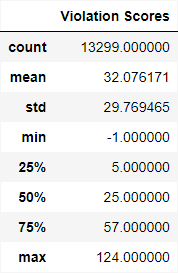

In [46]:
# Check stat summary
eda.graph_description(df[col], name)

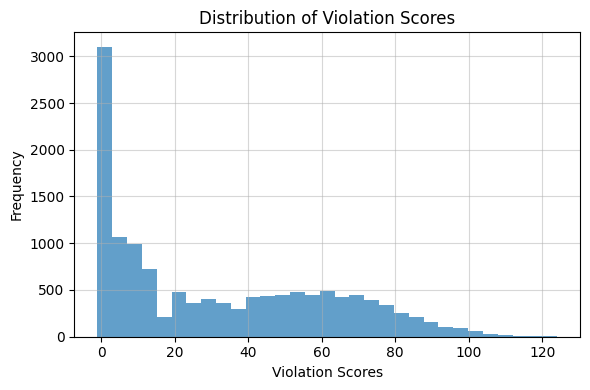

In [47]:
# Check spread
eda.graph_histogram(df[col], name)

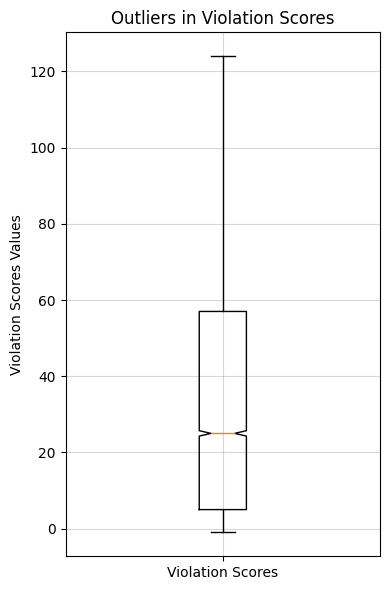

In [48]:
# Check outliers
eda.graph_boxplot(df[col], name)

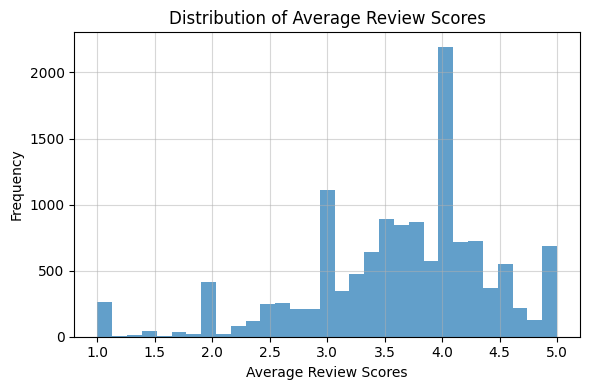

In [49]:
# Checking other column's spread
col = "average_review_rating"
name = "Average Review Scores"
eda.graph_histogram(df[col], name)

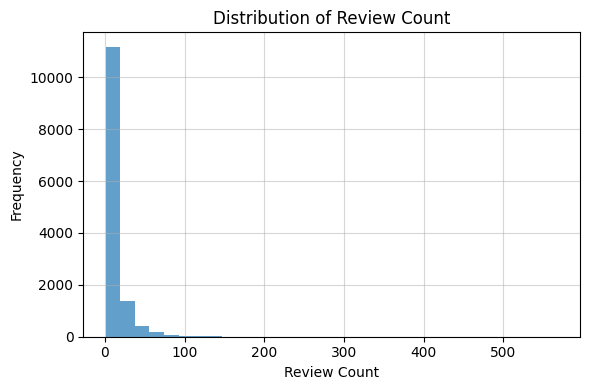

In [50]:
# Checking other column's spread
col = "review_count"
name = "Review Count"
eda.graph_histogram(df[col], name)

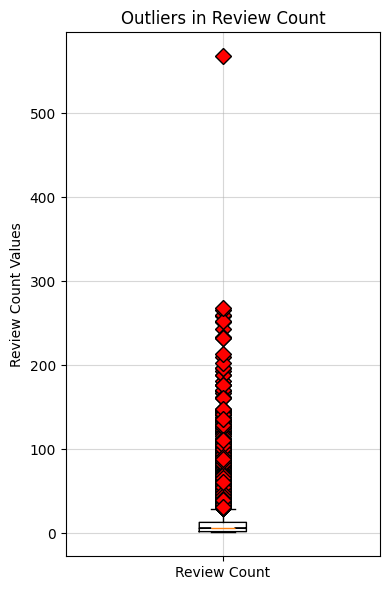

In [51]:
eda.graph_boxplot(df[col], name)

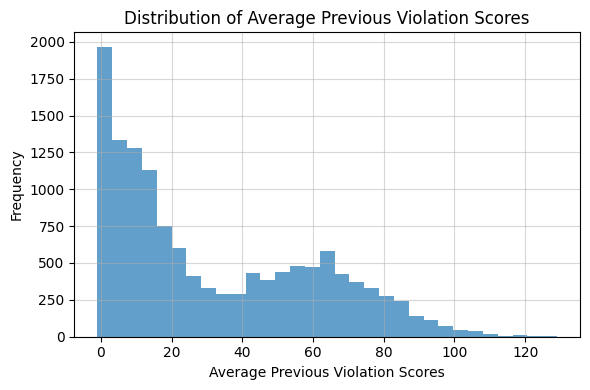

In [52]:
# Checking other column's spread
col = "inspection_average_prev_penalty_scores"
name = "Average Previous Violation Scores"
eda.graph_histogram(df[col], name)

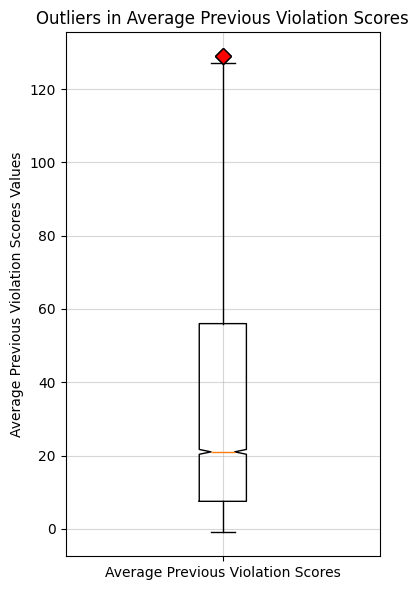

In [53]:
eda.graph_boxplot(df[col], name)

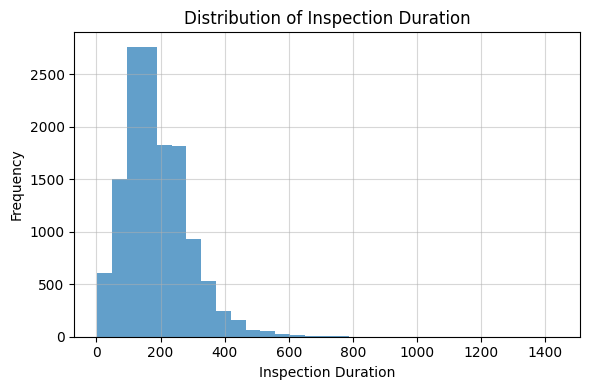

In [54]:
# Checking other column's spread
col = "inspection_duration (days)"
name = "Inspection Duration"
eda.graph_histogram(df[col], name)

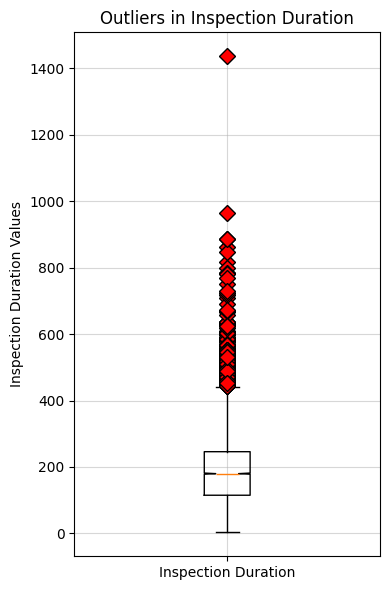

In [55]:
eda.graph_boxplot(df[col], name)

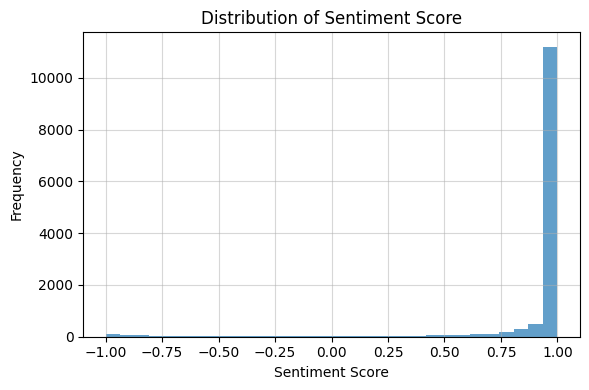

In [56]:
# Checking other column's spread
col = "sentiment_score"
name = "Sentiment Score"
eda.graph_histogram(df[col], name)

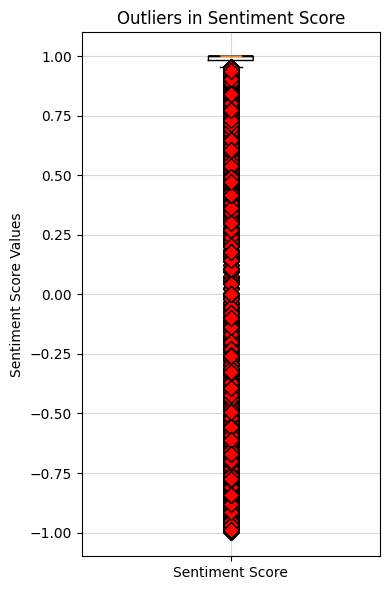

In [57]:
eda.graph_boxplot(df[col], name)

Strong mix of non-normal distributions with significant number of outliers. Will need to transform the data to improve performance.

## Data Cleaning P2

In [58]:
# Reload the data
df = imports.pd.read_csv(f"{imports.DEV_PATH_TO_PREPPED_DATA}/cleaned_featured_data.csv")
df.head(3)

,inspection_id,inspection_penalty_score,inspection_average_prev_penalty_scores,inspection_prev_penalty_score,review_count,non_positive_review_count,average_review_rating,asian,ethnic,number_of_cuisines,inspection_duration (days),season_Spring,season_Summer,season_Winter,sentiment_score,serious_violation
0,DA2383404,46,54.0,50,1,0,5.000000,1,1,2,239,0.0,0.0,1.0,0.9833,1
1,DA2304227,82,86.0,76,3,0,4.000000,1,1,2,95,0.0,0.0,0.0,0.9913,1
2,DA2278690,24,67.0,41,7,0,4.428571,1,1,2,301,0.0,0.0,1.0,0.9998,1


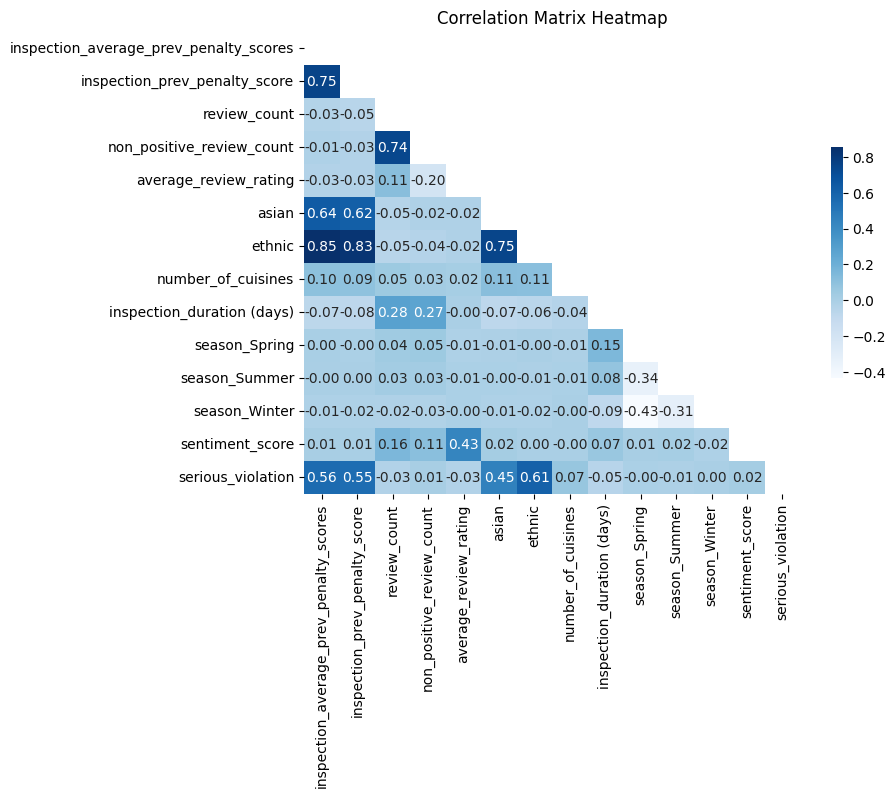

In [59]:
# Graphing corr matrix
corr_df = df.drop(["inspection_id", "inspection_penalty_score"], axis=1)
eda.graph_corr_matrix(corr_df)

In [60]:
# Average prev and prev score are highly correlated, which one directly calculated in another
# Asian and ethnic are also highlighly correlated, since any Asian food is automatically ethnic
# The review count & non positive review count are correlated, since one is the subset of another

The goal is to properly account for multicollinearity in our dataset by either engineering or removing features that cause this. If left untreated, multicollinearity can cause coefficient values to be unreliable, since small changes in the model or the data can lead to large changes in the coefficients (intuitively, this is because one change will affect all variables that are  collinear to each other). This, in turn, also makes discovering **which** dependent variables are the most impactful on our prediction. And lastly, multicollinearity increases the chance for the model to overfit.

In [61]:
# Checking multicollinearity using Variance Inflation Factor (VIF)
# Generally, a VIF above 5-10 indicates high multicollinearity
vif_data = imports.pd.DataFrame()
vif_data["feature"] = corr_df.columns[:-1]  # exclude target variable
vif_data["VIF"] = [imports.variance_inflation_factor(corr_df.iloc[:, :-1].values, i) for i in range(len(corr_df.columns[:-1]))]
vif_data

,feature,VIF
0,inspection_average_prev_penalty_scores,8.428725
1,inspection_prev_penalty_score,6.801595
2,review_count,3.331285
3,non_positive_review_count,3.594103
4,average_review_rating,19.482417
5,asian,3.276027
6,ethnic,11.289142
7,number_of_cuisines,9.995154
8,inspection_duration (days),4.884128
9,season_Spring,2.578153


Each VIF value represents how much the variance of an estimated regression coefficient increases if your predictors are correlated. For example, a VIF of 9.953721 for `sentiment_score` suggests that the variance (or the uncertainty) of its coefficient is almost 10 times larger than it would be if `sentiment_score` were completely uncorrelated with the other independent variables in the model.

## Feature Engineering P2

In [62]:
# removing collinearity from review_count vs. non_positive_review_count
df["perc_non_positive_review_count"] = df["non_positive_review_count"] / df["review_count"]
df.head(1)

,inspection_id,inspection_penalty_score,inspection_average_prev_penalty_scores,inspection_prev_penalty_score,review_count,non_positive_review_count,average_review_rating,asian,ethnic,number_of_cuisines,inspection_duration (days),season_Spring,season_Summer,season_Winter,sentiment_score,serious_violation,perc_non_positive_review_count
0,DA2383404,46,54.0,50,1,0,5.0,1,1,2,239,0.0,0.0,1.0,0.9833,1,0.0


In [63]:
# removing collinearity from inspection_average_prev_penalty_scores vs. inspection_prev_penalty_score
def trend(avg_prev, prev): # the lower the score the better, thus giving positive 1 for lower
    if prev < avg_prev:
        return 1
    elif prev > avg_prev:
        return -1
    else:
        return 0
df["review_trend"] = df.apply(lambda x: trend(x["inspection_average_prev_penalty_scores"], x["inspection_prev_penalty_score"]), axis=1)
df.head(1)

,inspection_id,inspection_penalty_score,inspection_average_prev_penalty_scores,inspection_prev_penalty_score,review_count,non_positive_review_count,average_review_rating,asian,ethnic,number_of_cuisines,inspection_duration (days),season_Spring,season_Summer,season_Winter,sentiment_score,serious_violation,perc_non_positive_review_count,review_trend
0,DA2383404,46,54.0,50,1,0,5.0,1,1,2,239,0.0,0.0,1.0,0.9833,1,0.0,1


In [64]:
# will just drop the average_rating, since we are assuming the sentiment score is more accurate predictor
drop_columns = ["inspection_penalty_score", 
                "inspection_prev_penalty_score",
                "review_count",
                "non_positive_review_count",
                "average_review_rating"]
df.drop(drop_columns, axis=1, inplace=True)
df.head(1)

,inspection_id,inspection_average_prev_penalty_scores,asian,ethnic,number_of_cuisines,inspection_duration (days),season_Spring,season_Summer,season_Winter,sentiment_score,serious_violation,perc_non_positive_review_count,review_trend
0,DA2383404,54.0,1,1,2,239,0.0,0.0,1.0,0.9833,1,0.0,1


In [65]:
# We will leave the asian-ethinic collinearity due to client specifications of wanting to use these two data rows

In [66]:
# Reordering cols so dependent variable is at the end
cols = df.columns.tolist()
cols = cols[:-3] + cols[-2:] + [cols[-3]]
df_reordered = df[cols]

# Save the file
filepath = f"{imports.DEV_PATH_TO_PREPPED_DATA}/cleaned_featured_data.csv"
df_reordered.to_csv(filepath, index=False)